In [ ]:
print("hello world !")

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
import sklearn.datasets as skds  # For generating synthetic datasets
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import classification_report  # For evaluating the model's performance

In [ ]:
# Generate a synthetic classification dataset
x = skds.make_classification(n_classes=2, n_features=5, n_samples=1000)

# Create a DataFrame from the features
df = pd.DataFrame(x[0], columns=[f"col{i}" for i in range(5)])

# Add the target variable to the DataFrame
df['target'] = x[1]

# Display the DataFrame
df

In [ ]:
for i in df.columns:
    df[i] = MinMaxScaler().fit_transform(df[[i]])

In [ ]:
# Loop through each column in the DataFrame
for i in df.columns:
    # Create a violin plot for the current column, grouped by the target variable
    sns.violinplot(x=df['target'], y=df[i])
    # Create a box plot for the current column, grouped by the target variable
    sns.boxplot(x=df['target'], y=df[i])    
    # Display the plots
    plt.show()

<Axes: >

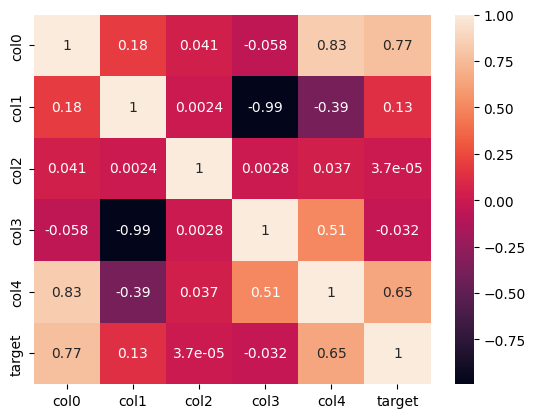

In [ ]:
# Create a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df.corr(), annot=True)

In [28]:
# Split the DataFrame into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.8, random_state=42)


In [40]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model using the training data
model.fit(xtrain, ytrain)

# Display the model
model


LogisticRegression()

In [38]:
# Use the trained model to make predictions on the test and train data
ypredict_test = model.predict(xtest)
ypredict_train = model.predict(xtrain)

In [51]:
# Print the classification report for the test data
print(classification_report(ytest, ypredict_test))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       402
         1.0       0.88      0.86      0.87       398

    accuracy                           0.88       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.88      0.87       800



In [50]:
# Print the classification report for the training data
print(classification_report(ytrain, ypredict_train))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        98
         1.0       0.93      0.91      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

